<a href="https://colab.research.google.com/github/danielegilardi/TTR_project/blob/main/Copy_of_TTR_progetto_multiclassSVM_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificatore: SVM

Features: estratte da immagini nwh con LDA

In [2]:
!wget https://www.dropbox.com/s/hjouw179a8i7a7f/features_lda.zip?dl=0
!unzip features_lda.zip?dl=0

!wget https://www.dropbox.com/s/rhbde9gw8vnk9dm/array_labels.zip?dl=0
!unzip array_labels.zip?dl=0

--2022-05-11 19:29:01--  https://www.dropbox.com/s/hjouw179a8i7a7f/features_lda.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hjouw179a8i7a7f/features_lda.zip [following]
--2022-05-11 19:29:01--  https://www.dropbox.com/s/raw/hjouw179a8i7a7f/features_lda.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce546ace446ab34192f398a0302.dl.dropboxusercontent.com/cd/0/inline/BlEVBS-rhokq3ethVcykNr_DNabfhU3nbI7tkCaK2EOarkyrPS6ltB5bDj2NNtOMoIFtYzQh8UZXWev9mnsvL0F8dIekOd49Er9lVksIGJRtkY3Mo7lKfVHOaAbvxiyNxc_S-8t3PZSIGl7BB4GqglSEw7orel3VoFzjDO5tbWGAlQ/file# [following]
--2022-05-11 19:29:02--  https://uce546ace446ab34192f398a0302.dl.dropboxusercontent.com/cd/0/inline/BlEVBS-rhokq3ethVcykNr_DNabfhU3nbI7tkCaK2EOarkyr

In [3]:
# Versione one-vs-rest del classificatore SVM per distinguere le classi del dataset FER_modified

import numpy as np

# Carico in memoria le features
x_train = np.load('features_lda/features_train_lda.npy')
y_train = np.load('array_labels/array_train_labels.npy')

x_test = np.load('features_lda/features_test_lda.npy')
y_test = np.load('array_labels/array_test_labels.npy')

In [4]:
print("np.shape(x_train): ")
print(np.shape(x_train))
print("np.shape(y_train): ")
print(np.shape(y_train))
print("np.shape(x_test): ")
print(np.shape(x_test))
print("np.shape(y_test): ")
print(np.shape(y_test))
print(x_train[2])
print(x_test[2])
print(y_train)
print(y_test)

np.shape(x_train): 
(31805, 6)
np.shape(y_train): 
(31805,)
np.shape(x_test): 
(7178, 6)
np.shape(y_test): 
(7178,)
[-0.02628702  0.66272669  1.16537791  1.12788344  0.01594082 -1.3280213 ]
[-0.41716458 -0.71278732  0.21396332  1.13954518  0.80624169 -0.07401849]
[0 0 0 ... 6 6 6]
[0 0 0 ... 6 6 6]


31805 6


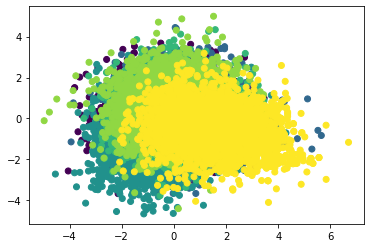

In [5]:
# Analizzo i dati

# Capisco quanti oggetti e feature ho
nobj = x_train.shape[0]
nfeat = x_train.shape[1]
print(nobj, nfeat)

# Capisco come sono i dati: scatter plot con le prime 2 features
from matplotlib import pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.show()


In [6]:
from sklearn.svm import SVC

# Inizializzo i parametri

kernel = 'rbf'
#degree = 5
#probability = True
# class_weight = dict or ‘balanced’, default=None
decision_function_shape = 'ovr'

max_iteration = 10000

# Inizializzo un modello di classificazione SVM per ognuna delle 7 classi

models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

In [7]:
# Addestro i modelli

for i in range(7):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

In [8]:
# Classifico i dati del testing set

predicted_scores = []
for i in range(7):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

print(np.shape(predicted_scores))
print(np.shape(predicted))
print(predicted_scores[:7])
print(predicted[:20])

(7, 7178)
(7178,)
[[0.60063102 0.12114987 0.11689334 ... 0.11309945 0.12104803 0.08796686]
 [0.00870774 0.01136317 0.01040674 ... 0.01380822 0.01380413 0.01058863]
 [0.12253107 0.12561318 0.11367245 ... 0.12141362 0.12603419 0.12070321]
 ...
 [0.11565163 0.1479901  0.15064716 ... 0.15255335 0.14284564 0.1309058 ]
 [0.15050073 0.1488157  0.15638205 ... 0.14913196 0.14478051 0.13420992]
 [0.05534731 0.07556347 0.07233532 ... 0.0606918  0.08352888 0.92942078]]
[0 3 3 0 0 0 3 0 3 2 4 3 5 4 3 0 3 3 3 3]


In [14]:
# matrice di confusione

cmc = np.zeros((7,7))

for pr,y_te in zip(predicted,y_test):
  cmc[y_te,pr] += 1.0

In [10]:
# calcolo accuratezza, precision e recall media rispetto alle 7 classi

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision = []
recall = []
for i in range(7):
  precision.append(cmc[i,i]/ np.sum(cmc[:,i]))
  recall.append(cmc[i,i]/ np.sum(cmc[i,:]))

precision = np.asarray(precision)
recall  = np.asarray(recall)

print(np.shape(precision))
print(np.shape(recall))

precision_m = np.mean(precision)
recall_m = np.mean(recall)

print(np.shape(precision_m))
print(np.shape(recall_m))
print(precision_m)
print(recall_m)

print('Accuratezza del classificatore: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precisione media del classificatore: ' + "{0:.2f}".format(precision_m))
print('Recall media del classificatore: ' + "{0:.2f}".format(recall_m))

(7,)
(7,)
()
()
0.47557854210070427
0.3499381211534333
Accuratezza del classificatore: 39.02%
Precisione media del classificatore: 0.48
Recall media del classificatore: 0.35


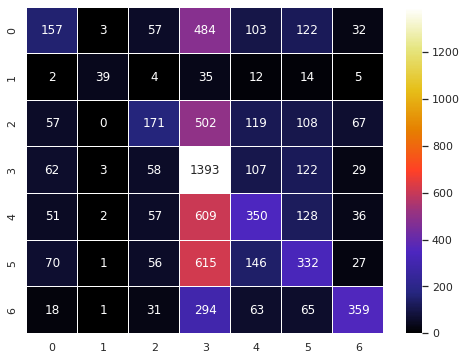

In [12]:
# stampo la matrice di confusione

import seaborn as sns; 


plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc, annot=True,fmt=".0f", linewidths=.1, cmap="CMRmap")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")


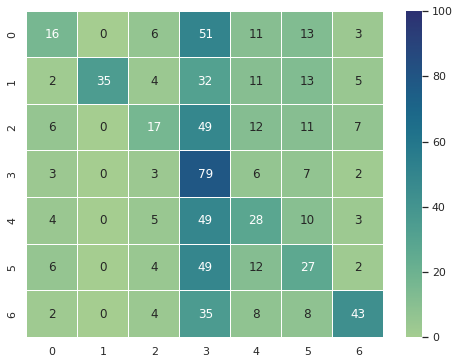

In [13]:
# ATTENZIONE, con questo codice vengono cambiati i valori della matrice cmc
# viene fatto solo per plottare una matrice con le percentuali per ogni riga

cmc2 = cmc

for i in range(7):
  total = 0
  for j in range(7):
    total += cmc[i,j]
  for j in range(7):
    cmc2[i,j] = cmc[i,j]*100/total
  
plt.rcParams["figure.figsize"] = (8,6)
sns.set_theme()

ax = sns.heatmap(cmc2, annot=True,vmin=0.0, vmax=100.0,fmt=".0f", linewidths=.1, cmap="crest")
#ax = sns.heatmap(cmc, linewidths=.3)
#ax = sns.heatmap(cmc, cmap="YlGnBu")